# hackStat 2.0 - Second Round Competitions


### Description of attached files

1. Variables Finalized - Retail.xlsx - Variable descriptions

2. retail_syn_hackathon_phase1.xlsx - Sysnthesized representation of the data

3. retail_sample_submission.csv - a sample submission file in the correct format. This should contain both the ID and predicted outcome

### Data Fields
**Retail Dataset**


In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', 100)
data = pd.read_excel("data/Variables Finalized - Retail.xlsx")
data.head(25)

,Variable Description,Variable
0,Record Identifier,ID
1,if growth of the relative net uplift in past days is high of the item then that item could have ...,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_la...
2,item selling price has an impact on promo sales,stg_selling_price_val
3,if growth of the relative net uplift in past days is high of the item then that item could have ...,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available
4,higher supplier contribution give more margin,supplier_funding_perc
5,if growth of the relative net uplift in past days is high of the item category then that item co...,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available
6,promotion mechanic has an impact on promo sales,is_gondola
7,percentage of selling price compared to cost has an impact on margin,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last...
8,if growth of the relative net uplift in past days is high of the item then that item could have ...,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available
9,if relative net uplift in past days is high of the item category then that item could have high ...,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available


### Importing the required Libraries and setting up the Seaborn and Pandas Options

In [3]:
# Importing required packages
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Setting up Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Setting up Seaborn
sns.set_style("whitegrid")
#sns.set_context("poster")

%matplotlib inline

In [4]:
#adding css
from IPython.core.display import HTML
css = open('data/style-table.css').read() + open('data/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Available data

In [5]:
#Importing the Data Sets

## Importing the Training set values.
df = pd.read_excel("data/retail_syn_hackathon_phase1.xlsx")
df2 = pd.read_csv("data/retail_syn_hackathon_phase2.csv")
df.head()

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,relative_margin_with_supplier_binary_positive
0,1,3.160738,97.333333,0.666667,8.0,0.809625,0,-0.013944,0.722222,3.140505e+06,1.251604e+06,0.792000,0.666667,0.265072,0.666667,3.921865e+05,4.317484e+06,7.783563e+04,1.487425,0.666667,0
1,2,NaN,NaN,0.666667,20.0,0.755808,0,NaN,0.805839,1.440000e+07,1.238795e+05,0.786408,0.666667,0.053909,0.666667,7.082339e+05,1.865331e+04,6.550478e+03,1.516007,0.666667,0
2,3,0.050940,134.000000,0.708333,10.0,0.883202,0,0.212323,0.666667,1.820000e+07,1.829148e+06,0.759740,0.666667,0.072617,0.716667,1.951419e+06,1.808293e+06,6.666667e-01,1.416069,NaN,0
3,4,-0.320610,116.000000,0.805556,15.0,0.741765,0,0.568599,0.666667,4.483487e+04,6.666667e-01,0.728941,0.679875,0.169533,NaN,7.852894e+03,1.259043e+05,6.212418e+06,1.266667,40783.565510,1
4,5,-0.320831,54.000000,0.763889,12.0,0.753799,0,NaN,0.666667,1.085983e+05,6.666667e-01,0.726190,0.666667,0.152485,0.829837,4.612412e+05,1.290186e+06,1.387780e+06,1.239664,NaN,0


In [6]:
df2.head()

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,relative_margin_with_supplier_binary_positive
0,4349,0.117885,77.333333,0.809524,15.000000,0.752381,0,-0.048117,1.000000,2.762954e+05,246256.171700,0.745501,0.666667,-0.017231,0.666667,9.951546e+04,1.342999e+05,70342.048630,1.446986,307480.052800,0
1,4350,-0.069852,84.000000,1.000000,15.000000,0.733738,0,NaN,0.666667,-1.349761e+06,0.666667,0.766454,NaN,0.110669,1.000000,1.360000e+07,3.139175e+05,0.666667,1.622814,0.666667,1
2,4351,0.093523,124.000000,0.888889,15.000000,0.743590,0,NaN,0.777778,3.387505e+05,133940.857900,0.751055,0.675676,0.023955,0.666667,1.721483e+06,-4.430048e+04,327644.089400,1.586081,0.666667,0
3,4352,0.080691,79.000000,0.825397,15.000000,0.774834,0,0.717034,1.000000,3.693539e+06,596912.914300,0.705870,NaN,NaN,1.000000,3.608549e+05,1.099134e+06,855587.254800,1.389092,338760.636000,0
4,4353,NaN,147.333333,0.666667,17.083334,0.790939,1,0.948116,0.666667,3.495417e+05,0.666667,0.691478,NaN,-0.046560,1.000000,-7.679845e+04,6.629232e+05,174563.766200,1.541538,74256.778750,0


In [7]:
# df.to_csv("data/retail_syn_hackathon_phase1.csv", sep=",")
# training_values = pd.read_csv('data/retail_syn_hackathon_phase1.csv', encoding = 'iso-8859-1')
training_values = pd.concat([df, df2], ignore_index=True)
test_values = pd.read_csv("data/retail_phase3_testdata.csv")
submission = pd.read_csv("data/retail_sample_submission.csv")
training_values.to_csv("data/retail_syn_hackathon_combined.csv", sep=",")

In [8]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

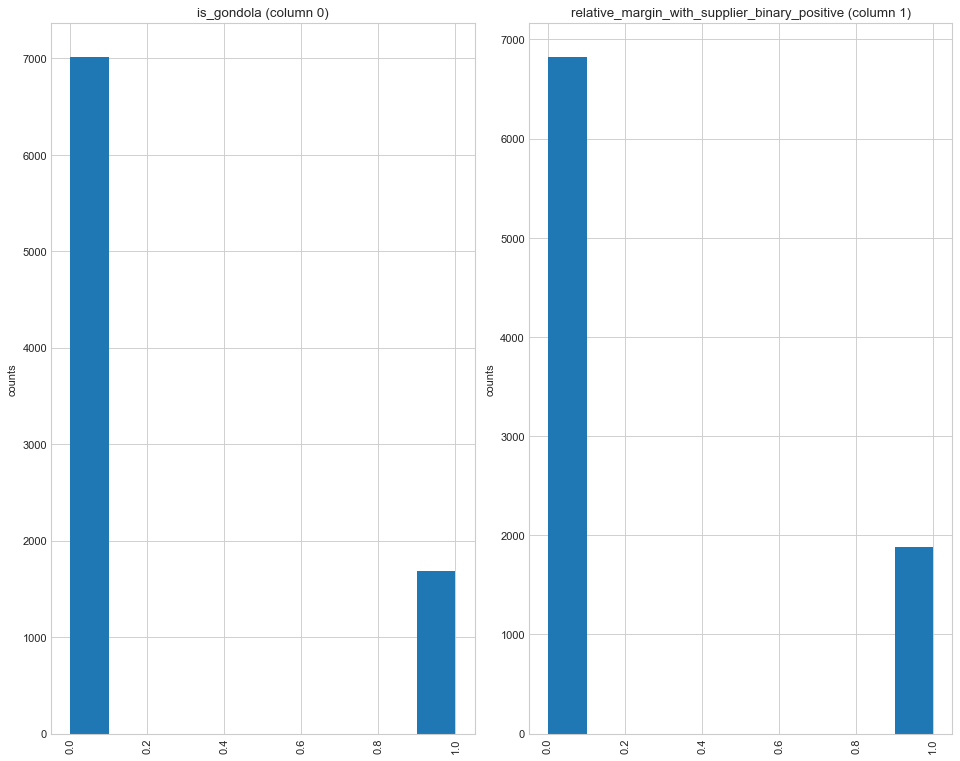

In [9]:
plotPerColumnDistribution(training_values, 40, 5)

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

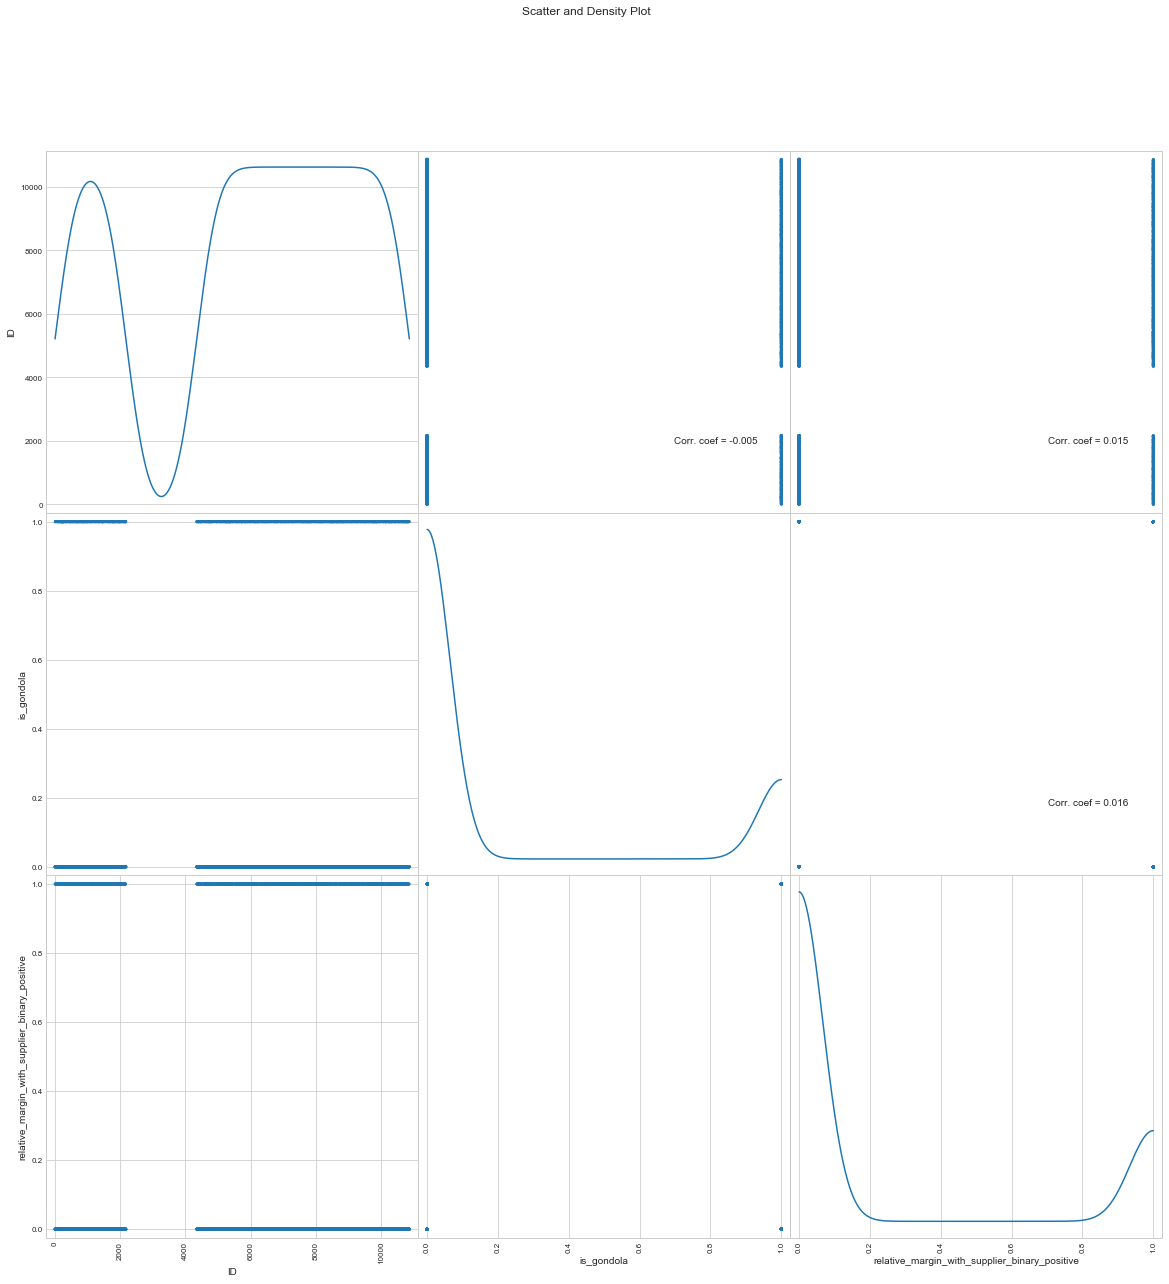

In [11]:
plotScatterMatrix(training_values, 20, 10)

In [12]:
training_values.head()

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,relative_margin_with_supplier_binary_positive
0,1,3.160738,97.333333,0.666667,8.0,0.809625,0,-0.013944,0.722222,3.140505e+06,1.251604e+06,0.792000,0.666667,0.265072,0.666667,3.921865e+05,4.317484e+06,7.783563e+04,1.487425,0.666667,0
1,2,NaN,NaN,0.666667,20.0,0.755808,0,NaN,0.805839,1.440000e+07,1.238795e+05,0.786408,0.666667,0.053909,0.666667,7.082339e+05,1.865331e+04,6.550478e+03,1.516007,0.666667,0
2,3,0.050940,134.000000,0.708333,10.0,0.883202,0,0.212323,0.666667,1.820000e+07,1.829148e+06,0.759740,0.666667,0.072617,0.716667,1.951419e+06,1.808293e+06,6.666667e-01,1.416069,NaN,0
3,4,-0.320610,116.000000,0.805556,15.0,0.741765,0,0.568599,0.666667,4.483487e+04,6.666667e-01,0.728941,0.679875,0.169533,NaN,7.852894e+03,1.259043e+05,6.212418e+06,1.266667,40783.565510,1
4,5,-0.320831,54.000000,0.763889,12.0,0.753799,0,NaN,0.666667,1.085983e+05,6.666667e-01,0.726190,0.666667,0.152485,0.829837,4.612412e+05,1.290186e+06,1.387780e+06,1.239664,NaN,0


In [13]:
test_values.head()

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year
0,2175,NaN,27.333333,0.733333,10.0,NaN,1,NaN,0.948718,-9.118623e+05,6.666667e-01,0.776836,0.685052,NaN,0.933908,2.669018e+06,1.255533e+06,3.510582e+05,1.478093,0.666667
1,2176,0.585704,184.000000,0.833333,15.0,0.710807,0,-0.127925,1.000000,-2.035421e+05,1.269514e+06,0.692308,0.666667,-0.529674,0.733333,1.277140e+06,8.031801e+05,9.146003e+03,1.437291,284553.875100
2,2177,0.415656,197.333333,0.701754,25.0,0.784188,0,NaN,NaN,5.063720e+04,1.797630e+06,0.759070,0.674419,0.137536,0.666667,-7.318261e+05,8.596364e+05,1.164726e+05,1.437458,0.666667
3,2178,0.090431,134.000000,0.851852,15.0,0.780794,0,1.906759,0.833333,-1.084377e+05,6.666667e-01,0.719210,0.666667,-0.016270,0.666667,1.135122e+05,8.509393e+05,5.893869e+04,1.413410,423483.113900
4,2179,NaN,77.333333,0.754386,20.0,0.738562,1,NaN,0.688889,1.055088e+06,1.339409e+05,0.716253,0.666667,-0.134010,0.666667,NaN,1.041989e+05,2.800142e+06,1.346457,0.666667


In [14]:
submission.head()

,ID,relative_margin_with_supplier_binary_positive
0,2175,0
1,2176,0
2,2177,0
3,2178,0
4,2179,0


> Let us look at all the available Features or can be called as Data Dictionary.

In [15]:
list(training_values.columns.values)

['ID',
 'ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year',
 'stg_selling_price_val',
 'rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available',
 'supplier_funding_perc',
 'rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available',
 'is_gondola',
 'ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available',
 'rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available',
 'rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available',
 'rolling_sum_180_baseline_split_stg_item_cd_last_available',
 'rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available',
 'rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year',
 'ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available',
 'rolling_mean_540_rela

In [16]:
# del training_values['Unnamed: 0']

> __ Above are the available Features in our data set.__

In [17]:
training_values.relative_margin_with_supplier_binary_positive.value_counts()

0    6822
1    1877
Name: relative_margin_with_supplier_binary_positive, dtype: int64

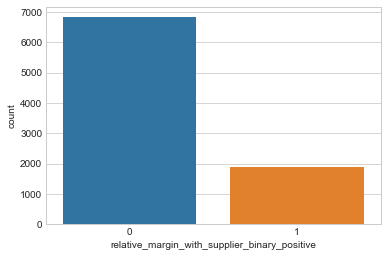

In [18]:
sns.countplot(training_values['relative_margin_with_supplier_binary_positive'])

In [19]:
training_values.relative_margin_with_supplier_binary_positive.value_counts()/len(training_values.relative_margin_with_supplier_binary_positive)

0    0.784228
1    0.215772
Name: relative_margin_with_supplier_binary_positive, dtype: float64

In [20]:
training_df = training_values

In [21]:
training_df.head(5)

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,relative_margin_with_supplier_binary_positive
0,1,3.160738,97.333333,0.666667,8.0,0.809625,0,-0.013944,0.722222,3.140505e+06,1.251604e+06,0.792000,0.666667,0.265072,0.666667,3.921865e+05,4.317484e+06,7.783563e+04,1.487425,0.666667,0
1,2,NaN,NaN,0.666667,20.0,0.755808,0,NaN,0.805839,1.440000e+07,1.238795e+05,0.786408,0.666667,0.053909,0.666667,7.082339e+05,1.865331e+04,6.550478e+03,1.516007,0.666667,0
2,3,0.050940,134.000000,0.708333,10.0,0.883202,0,0.212323,0.666667,1.820000e+07,1.829148e+06,0.759740,0.666667,0.072617,0.716667,1.951419e+06,1.808293e+06,6.666667e-01,1.416069,NaN,0
3,4,-0.320610,116.000000,0.805556,15.0,0.741765,0,0.568599,0.666667,4.483487e+04,6.666667e-01,0.728941,0.679875,0.169533,NaN,7.852894e+03,1.259043e+05,6.212418e+06,1.266667,40783.565510,1
4,5,-0.320831,54.000000,0.763889,12.0,0.753799,0,NaN,0.666667,1.085983e+05,6.666667e-01,0.726190,0.666667,0.152485,0.829837,4.612412e+05,1.290186e+06,1.387780e+06,1.239664,NaN,0


### Before analyzing let us look at the training data we have and check if we have to clean anything.

In [22]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8699 entries, 0 to 8698
Data columns (total 21 columns):
ID                                                                                                              8699 non-null int64
ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year         5786 non-null float64
stg_selling_price_val                                                                                           8152 non-null float64
rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available                                    7719 non-null float64
supplier_funding_perc                                                                                           8685 non-null float64
rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available                            8647 non-null float64
is_gondola                                                                                 

> __lets check if each Feature contains any null values or not.__

In [23]:
training_df.apply(lambda x: sum(x.isnull()))

ID                                                                                                                 0
ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year         2913
stg_selling_price_val                                                                                            547
rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available                                     980
supplier_funding_perc                                                                                             14
rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available                              52
is_gondola                                                                                                         0
ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available      3669
rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_las

In [24]:
test_values.apply(lambda x: sum(x.isnull()))

ID                                                                                                                0
ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year         738
stg_selling_price_val                                                                                           162
rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available                                    244
supplier_funding_perc                                                                                             4
rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available                             20
is_gondola                                                                                                        0
ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available      905
rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_availa

In [25]:
# create variable indicating missingness
for column in training_df:
    training_df[column+'_NA'] = np.where(training_df[column].isnull(), 1, 0)
training_df.head(20)

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,relative_margin_with_supplier_binary_positive,ID_NA,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,stg_selling_price_val_NA,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA,supplier_funding_perc_NA,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available_NA,is_gondola_NA,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available_NA,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year_NA,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year_NA,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available_NA,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,relative_margin_with_supplier_binary_positive_NA
0,1,3.160738,97.333333,0.666667,8.000000,0.809625,0,-0.013944,0.722222,3.140505e+06,1.251604e+06,0.792000,0.666667,0.265072,0.666667,3.921865e+05,4.317484e+06,7.783563e+04,1.487425,6.666667e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,NaN,NaN,0.666667,20.000000,0.755808,0,NaN,0.805839,1.440000e+07,1.238795e+05,0.786408,0.666667,0.053909,0.666667,7.082339e+05,1.865331e+04,6.550478e+03,1.516007,6.666667e-01,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.050940,134.000000,0.708333,10.000000,0.883202,0,0.212323,0.666667,1.820000e+07,1.829148e+06,0.759740,0.666667,0.072617,0.716667,1.951419e+06,1.808293e+06,6.666667e-01,1.416069,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,-0.320610,116.000000,0.805556,15.000000,0.741765,0,0.568599,0.666667,4.483487e+04,6.666667e-01,0.728941,0.679875,0.169533,NaN,7.852894e+03,1.259043e+05,6.212418e+06,1.266667,4.078357e+04,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,-0.320831,54.000000,0.763889,12.000000,0.753799,0,NaN,0.666667,1.085983e+05,6.666667e-01,0.726190,0.666667,0.152485,0.829837,4.612412e+05,1.290186e+06,1.387780e+06,1.239664,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,6,

In [26]:
for column in test_values:
    test_values[column+'_NA'] = np.where(test_values[column].isnull(), 1, 0)

In [27]:
training_df['supplier_funding_perc_zero'] = 0

In [28]:
test_values['supplier_funding_perc_zero'] = 0

In [29]:
training_df['supplier_funding_perc_zero'].fillna((training_df['supplier_funding_perc'].mean()), inplace=True)

In [30]:
test_values['supplier_funding_perc_zero'].fillna((test_values['supplier_funding_perc'].mean()), inplace=True)

In [31]:
count_nan = len(training_df['supplier_funding_perc']) - training_df['supplier_funding_perc'].count()
count_nan

14

In [32]:
count_nan = len(training_df['supplier_funding_perc_zero']) - training_df['supplier_funding_perc_zero'].count()
count_nan

0

In [33]:
count_nan = len(test_values['supplier_funding_perc_zero']) - test_values['supplier_funding_perc_zero'].count()
count_nan

0

In [34]:
observation = training_df[training_df.supplier_funding_perc_zero.isnull()].tail(1)
observation

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,relative_margin_with_supplier_binary_positive,ID_NA,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,stg_selling_price_val_NA,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA,supplier_funding_perc_NA,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available_NA,is_gondola_NA,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available_NA,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year_NA,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year_NA,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available_NA,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,relative_margin_with_supplier_binary_positive_NA,supplier_funding_perc_zero


In [35]:
training_df.apply(lambda x: sum(x.isnull()))

ID                                                                                                                    0
ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year            2913
stg_selling_price_val                                                                                               547
rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available                                        980
supplier_funding_perc                                                                                                14
rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available                                 52
is_gondola                                                                                                            0
ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available         3669
rolling_mean_360_relative_uplift_binary_

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_df, training_df.relative_margin_with_supplier_binary_positive, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((6089, 43), (2610, 43))

In [37]:
def impute_na(variable):
    for i, row in training_df[training_df[variable].isnull()].iterrows():
        obs_sample = X_train[variable].dropna().sample(1, random_state=int(row.supplier_funding_perc_zero))
        obs_sample.index = [i]
        training_df.at[i, variable] = obs_sample

In [38]:
def impute_na_test(variable):
    for i, row in test_values[test_values[variable].isnull()].iterrows():
        obs_sample = X_train[variable].dropna().sample(1, random_state=int(row.supplier_funding_perc_zero))
        obs_sample.index = [i]
        test_values.at[i, variable] = obs_sample

In [39]:
training_df['supplier_funding_perc_zero'].isna().sum()

0

In [40]:
for column in training_df:
    impute_na(column)

In [41]:
for column in test_values:
    impute_na_test(column)

In [42]:
training_df.head(5)

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,relative_margin_with_supplier_binary_positive,ID_NA,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,stg_selling_price_val_NA,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA,supplier_funding_perc_NA,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available_NA,is_gondola_NA,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available_NA,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year_NA,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year_NA,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available_NA,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,relative_margin_with_supplier_binary_positive_NA,supplier_funding_perc_zero
0,1,3.160738,97.333333,0.666667,8.0,0.809625,0,-0.013944,0.722222,3.140505e+06,1.251604e+06,0.792000,0.666667,0.265072,0.666667,3.921865e+05,4.317484e+06,7.783563e+04,1.487425,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.135649,197.333333,0.666667,20.0,0.755808,0,1.372712,0.805839,1.440000e+07,1.238795e+05,0.786408,0.666667,0.053909,0.666667,7.082339e+05,1.865331e+04,6.550478e+03,1.516007,0.666667,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.050940,134.000000,0.708333,10.0,0.883202,0,0.212323,0.666667,1.820000e+07,1.829148e+06,0.759740,0.666667,0.072617,0.716667,1.951419e+06,1.808293e+06,6.666667e-01,1.416069,222913.233900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,-0.320610,116.000000,0.805556,15.0,0.741765,0,0.568599,0.666667,4.483487e+04,6.666667e-01,0.728941,0.679875,0.169533,1.000000,7.852894e+03,1.259043e+05,6.212418e+06,1.266667,40783.565510,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,-0.320831,54.000000,0.763889,12.0,0.753799,0,1.372712,0.666667,1.085983e+05,6.666667e-01,0.726190,0.666667,0.152485,0.829837,4.612412e+05,1.290186e+06,1.387780e+06,1.239664,222913.233900

In [43]:
test_values.head(5)

,ID,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,stg_selling_price_val,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_year,ID_NA,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,stg_selling_price_val_NA,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA,supplier_funding_perc_NA,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available_NA,is_gondola_NA,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available_NA,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year_NA,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available_NA,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year_NA,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available_NA,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available_NA,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available_NA,rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,supplier_funding_perc_zero
0,2175,0.135649,27.333333,0.733333,10.0,0.722807,1,1.372712,0.948718,-9.118623e+05,6.666667e-01,0.776836,0.685052,0.369241,0.933908,2.669018e+06,1.255533e+06,3.510582e+05,1.478093,0.666667,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2176,0.585704,184.000000,0.833333,15.0,0.710807,0,-0.127925,1.000000,-2.035421e+05,1.269514e+06,0.692308,0.666667,-0.529674,0.733333,1.277140e+06,8.031801e+05,9.146003e+03,1.437291,284553.875100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2177,0.415656,197.333333,0.701754,25.0,0.784188,0,1.372712,0.666667,5.063720e+04,1.797630e+06,0.759070,0.674419,0.137536,0.666667,-7.318261e+05,8.596364e+05,1.164726e+05,1.437458,0.666667,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2178,0.090431,134.000000,0.851852,15.0,0.780794,0,1.906759,0.833333,-1.084377e+05,6.666667e-01,0.719210,0.666667,-0.016270,0.666667,1.135122e+05,8.509393e+05,5.893869e+04,1.413410,423483.113900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2179,0.135649,77.333333,0.754386,20.0,0.738562,1,1.372712,0.688889,1.055088e+06,1.339409e+05,0.716253,0.666667,-0.134010,0.666667,1.439479e+05,1.041989e+05,2.800142e+06,1.346457,0.666667,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [44]:
training_df.apply(lambda x: sum(x.isnull()))

ID                                                                                                                 0
ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year            0
stg_selling_price_val                                                                                              0
rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available                                       0
supplier_funding_perc                                                                                              0
rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available                               0
is_gondola                                                                                                         0
ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available         0
rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_las

In [45]:
# del training_values['relative_margin_with_supplier_binary_positive_NA']
training_df = training_df.drop('relative_margin_with_supplier_binary_positive_NA', axis=1)
# training_df = training_df.drop('ID_NA', axis=1)
# training_df = training_df.drop('supplier_funding_perc_zero', axis=1)
# del training_values['ID_NA']
# del training_values['supplier_funding_perc_zero']

# del test_values['relative_margin_with_supplier_binary_positive_NA']
# test_values = test_values.drop('relative_margin_with_supplier_binary_positive_NA', axis=1)
# test_values = test_values.drop('ID_NA', axis=1)
# test_values = test_values.drop('supplier_funding_perc_zero', axis=1)

# del test_values['ID_NA']
# del test_values['supplier_funding_perc_zero']

In [46]:
NA_cols = [col for col in training_values.columns if 'NA' in col]
NA_cols

['ID_NA',
 'ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA',
 'stg_selling_price_val_NA',
 'rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA',
 'supplier_funding_perc_NA',
 'rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available_NA',
 'is_gondola_NA',
 'ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA',
 'rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA',
 'rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available_NA',
 'rolling_sum_180_baseline_split_stg_item_cd_last_available_NA',
 'rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available_NA',
 'rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year_NA',
 'ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_l

In [47]:
training = training_df.drop('relative_margin_with_supplier_binary_positive', axis=1)
training = training.drop('ID', axis=1)
training = training.drop('stg_selling_price_val', axis=1)
# training = training.drop('stg_selling_price_val_NA', axis=1)

training = training.drop('supplier_funding_perc_NA', axis=1)
training = training.drop('stg_selling_price_val_NA', axis=1)
training = training.drop('rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available_NA', axis=1)
training = training.drop('is_gondola_NA', axis=1)
training = training.drop('rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available_NA', axis=1)
training = training.drop('rolling_sum_180_baseline_split_stg_item_cd_last_available_NA', axis=1)
training = training.drop('rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available_NA', axis=1)
training = training.drop('rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year_NA', axis=1)
training = training.drop('rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year_NA', axis=1)
training = training.drop('rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available_NA', axis=1)
training = training.drop('rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available_NA', axis=1)
training = training.drop('ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available_NA', axis=1)
training = training.drop('rolling_sum_180_baseline_split_stg_item_cd_last_year_NA', axis=1)
training = training.drop('rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available', axis=1)
training = training.drop('rolling_sum_180_baseline_split_stg_item_cd_last_year', axis=1)


# test = test_values.drop('relative_margin_with_supplier_binary_positive', axis=1)
test = test_values.drop('ID', axis=1)
test = test.drop('stg_selling_price_val', axis=1)
# training = training.drop('stg_selling_price_val_NA', axis=1)

test = test.drop('supplier_funding_perc_NA', axis=1)
test = test.drop('stg_selling_price_val_NA', axis=1)
test = test.drop('rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available_NA', axis=1)
test = test.drop('is_gondola_NA', axis=1)
test = test.drop('rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available_NA', axis=1)
test = test.drop('rolling_sum_180_baseline_split_stg_item_cd_last_available_NA', axis=1)
test = test.drop('rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available_NA', axis=1)
test = test.drop('rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year_NA', axis=1)
test = test.drop('rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year_NA', axis=1)
test = test.drop('rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available_NA', axis=1)
test = test.drop('rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available_NA', axis=1)
test = test.drop('ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available_NA', axis=1)
test = test.drop('rolling_sum_180_baseline_split_stg_item_cd_last_year_NA', axis=1)
test = test.drop('rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available', axis=1)
test = test.drop('rolling_sum_180_baseline_split_stg_item_cd_last_year', axis=1)


X = training.as_matrix()
training.head()

,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,ID_NA,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available_NA,supplier_funding_perc_zero
0,3.160738,0.666667,8.0,0.809625,0,-0.013944,3.140505e+06,1.251604e+06,0.792000,0.666667,0.265072,0.666667,3.921865e+05,4.317484e+06,7.783563e+04,1.487425,0,0,0,0,0,0,0,0
1,0.135649,0.666667,20.0,0.755808,0,1.372712,1.440000e+07,1.238795e+05,0.786408,0.666667,0.053909,0.666667,7.082339e+05,1.865331e+04,6.550478e+03,1.516007,0,1,0,1,0,0,0,0
2,0.050940,0.708333,10.0,0.883202,0,0.212323,1.820000e+07,1.829148e+06,0.759740,0.666667,0.072617,0.716667,1.951419e+06,1.808293e+06,6.666667e-01,1.416069,0,0,0,0,0,0,0,0
3,-0.320610,0.805556,15.0,0.741765,0,0.568599,4.483487e+04,6.666667e-01,0.728941,0.679875,0.169533,1.000000,7.852894e+03,1.259043e+05,6.212418e+06,1.266667,0,0,0,0,0,0,1,0
4,-0.320831,0.763889,12.0,0.753799,0,1.372712,1.085983e+05,6.666667e-01,0.726190,0.666667,0.152485,0.829837,4.612412e+05,1.290186e+06,1.387780e+06,1.239664,0,0,0,1,0,0,0,0


In [48]:
test.head()

,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,ID_NA,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available_NA,supplier_funding_perc_zero
0,0.135649,0.733333,10.0,0.722807,1,1.372712,-9.118623e+05,6.666667e-01,0.776836,0.685052,0.369241,0.933908,2.669018e+06,1.255533e+06,3.510582e+05,1.478093,0,1,0,1,0,1,0,0
1,0.585704,0.833333,15.0,0.710807,0,-0.127925,-2.035421e+05,1.269514e+06,0.692308,0.666667,-0.529674,0.733333,1.277140e+06,8.031801e+05,9.146003e+03,1.437291,0,0,0,0,0,0,0,0
2,0.415656,0.701754,25.0,0.784188,0,1.372712,5.063720e+04,1.797630e+06,0.759070,0.674419,0.137536,0.666667,-7.318261e+05,8.596364e+05,1.164726e+05,1.437458,0,0,0,1,1,0,0,0
3,0.090431,0.851852,15.0,0.780794,0,1.906759,-1.084377e+05,6.666667e-01,0.719210,0.666667,-0.016270,0.666667,1.135122e+05,8.509393e+05,5.893869e+04,1.413410,0,0,0,0,0,0,0,0
4,0.135649,0.754386,20.0,0.738562,1,1.372712,1.055088e+06,1.339409e+05,0.716253,0.666667,-0.134010,0.666667,1.439479e+05,1.041989e+05,2.800142e+06,1.346457,0,1,0,1,0,0,0,0


In [49]:
training.to_csv('prediction/training_processed.csv', index=False)
test.to_csv('prediction/test_processed.csv', index=False)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, training_df.relative_margin_with_supplier_binary_positive, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((6089, 24), (2610, 24))

In [51]:
# train = pd.read_csv('data/training_data.csv')
# test = pd.read_csv('data/test_data.csv')

In [52]:
# X_train.head()

In [53]:
y_train.value_counts()

0    4798
1    1291
Name: relative_margin_with_supplier_binary_positive, dtype: int64

In [54]:
y_test.value_counts()

0    2024
1     586
Name: relative_margin_with_supplier_binary_positive, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE
ovrsmple = SMOTE(ratio='minority')
# ovrsmple = BorderlineSMOTE()
# ovrsmple = ADASYN()

X_train, y_train = ovrsmple.fit_sample(X_train, y_train)

In [56]:
np.bincount(y_train)

array([4798, 4798], dtype=int64)

In [57]:
import sklearn.ensemble
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=500,
                                              min_samples_split=5,
                                              criterion='gini', 
                                              max_features='auto',
                                              max_depth = 8,
                                              oob_score=True,
                                              random_state=42,
                                              n_jobs=-1)

In [58]:
rfc.fit(X_train, y_train)

print('Random Forest Classifier Train Accuracy Score :', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score :', rfc.score(X_test, y_test))

Random Forest Classifier Train Accuracy Score : 0.8511879949979158
Random Forest Classifier Test Score : 0.7731800766283525


In [59]:
#plt.rcParams['figure.figsize'] = (6.0, 6.0)
from sklearn.metrics import confusion_matrix
labels=['0','1']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlOrRd):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

Confusion matrix
[[4787   11]
 [1417 3381]]


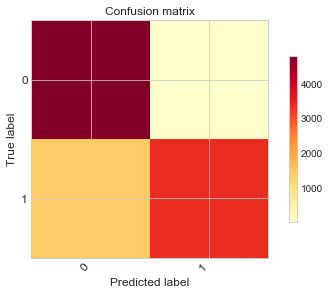

In [60]:
## Constructing the Confusion Matrix
cm = confusion_matrix(y_train, rfc.predict(X_train))
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [61]:
print(rfc.feature_importances_)

[0.04 0.04 0.08 0.02 0.05 0.07 0.02 0.02 0.01 0.02 0.03 0.06 0.01 0.02
 0.02 0.01 0.   0.14 0.02 0.17 0.03 0.09 0.03 0.  ]


Text(0,0.5,'Importance')

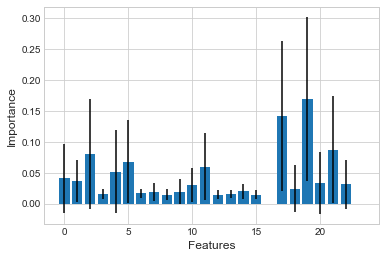

In [62]:
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=training.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_ 
                            for tree in rfc.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]
lables = list(training.columns.values)



ax = plt.bar(x, y, yerr=yerr ,align="center")
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Importance', fontsize = 12)

#plt.show()

In [63]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [64]:
svc.fit(X_train, y_train)
print('SVM Train Accuracy Score :', svc.score(X_train, y_train))
print('SVM Test Score :', svc.score(X_test, y_test))

SVM Train Accuracy Score : 0.4941642350979575
SVM Test Score : 0.5168582375478927


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [66]:
knn.fit(X_train, y_train)
print('SVM Train Accuracy Score :', knn.score(X_train, y_train))
print('SVM Test Score :', knn.score(X_test, y_test))

SVM Train Accuracy Score : 0.8251354731137974
SVM Test Score : 0.5363984674329502


In [67]:
from sklearn.metrics import classification_report

In [68]:
predicted = rfc.predict(X_test)

In [69]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.78      1.00      0.87      2024
          1       0.29      0.01      0.01       586

avg / total       0.67      0.77      0.68      2610



Confusion matrix
[[2014   10]
 [ 582    4]]


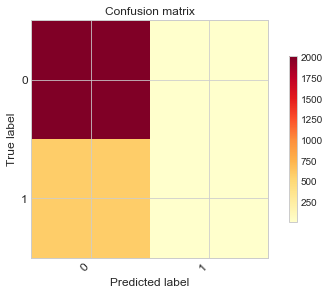

In [70]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [71]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

In [72]:
print(all_accuracies)

[0.5  0.5  0.65 0.97 0.97 0.97 0.97 0.98 0.97 0.97]


In [73]:
print(all_accuracies.mean()) 

0.8462373869171886


In [74]:
print(all_accuracies.std())  

0.19757363853297413


In [75]:
predict = rfc.predict(test)

In [76]:
Final_merge = pd.concat([test, submission], axis=1)

In [77]:
Final_merge.head()

,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available,supplier_funding_perc,rolling_mean_720_relative_uplift_binary_negative_stg_item_category_cd_last_available,is_gondola,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_360_relative_uplift_multiclass_mid_stg_item_category_cd_last_available,rolling_mean_180_relative_margin_with_supplier_binary_positive_stg_item_category_cd_last_year,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available,rolling_sum_180_net_uplift_split_stg_item_category_cd_last_year,rolling_sum_90_net_uplift_split_stg_item_category_cd_last_available,rolling_sum_365_prm_net_amount_without_tax_val_if_promo_stg_item_cd_last_available,ratio_mean_30_stg_item_selling_price_val_stg_item_cost_price_val_last_available,ID_NA,ratio_rolling_sum_180_net_uplift_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_year_NA,rolling_mean_1126_relative_uplift_binary_negative_stg_item_cd_last_available_NA,ratio_rolling_sum_60_net_uplift_split_stg_item_cd_rolling_sum_60_baseline_split_stg_item_cd_last_available_NA,rolling_mean_360_relative_uplift_binary_negative_stg_item_cd_last_available_NA,ratio_rolling_sum_180_net_margin_split_stg_item_cd_rolling_sum_180_baseline_split_stg_item_cd_last_available_NA,rolling_mean_540_relative_margin_binary_positive_stg_item_cd_last_available_NA,supplier_funding_perc_zero,ID,relative_margin_with_supplier_binary_positive
0,0.135649,0.733333,10.0,0.722807,1,1.372712,-9.118623e+05,6.666667e-01,0.776836,0.685052,0.369241,0.933908,2.669018e+06,1.255533e+06,3.510582e+05,1.478093,0,1,0,1,0,1,0,0,2175,0
1,0.585704,0.833333,15.0,0.710807,0,-0.127925,-2.035421e+05,1.269514e+06,0.692308,0.666667,-0.529674,0.733333,1.277140e+06,8.031801e+05,9.146003e+03,1.437291,0,0,0,0,0,0,0,0,2176,0
2,0.415656,0.701754,25.0,0.784188,0,1.372712,5.063720e+04,1.797630e+06,0.759070,0.674419,0.137536,0.666667,-7.318261e+05,8.596364e+05,1.164726e+05,1.437458,0,0,0,1,1,0,0,0,2177,0
3,0.090431,0.851852,15.0,0.780794,0,1.906759,-1.084377e+05,6.666667e-01,0.719210,0.666667,-0.016270,0.666667,1.135122e+05,8.509393e+05,5.893869e+04,1.413410,0,0,0,0,0,0,0,0,2178,0
4,0.135649,0.754386,20.0,0.738562,1,1.372712,1.055088e+06,1.339409e+05,0.716253,0.666667,-0.134010,0.666667,1.439479e+05,1.041989e+05,2.800142e+06,1.346457,0,1,0,1,0,0,0,0,2179,0


In [78]:
Final_merge['relative_margin_with_supplier_binary_positive'] = predict

In [79]:
len(Final_merge.index)

2174

In [80]:
Final_merge[['ID','relative_margin_with_supplier_binary_positive']].to_csv('prediction/AsyncWave.csv', index=False)

In [81]:
sub = pd.read_csv('prediction/AsyncWave.csv')

In [82]:
sub.head()

,ID,relative_margin_with_supplier_binary_positive
0,2175,0
1,2176,0
2,2177,0
3,2178,0
4,2179,0
